In [1]:
import numpy as np
import pandas as pd
import glob

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

# Old DF

In [5]:
old_X = np.load("../data/input_TS_merge/TS_X_filter.npy")
old_y = np.load("../data/input_TS_merge/TS_y_filter.npy")

var_list = ['day_cos', 'day_sin', 'dayl..s.', 'month_cos', 'month_sin',
            'prcp..mm.day.', 'srad..W.m.2.', 'th', 'tmax..deg.c.', 'tmin..deg.c.',
            'vp..Pa.', 'vs', 'year', 'Density_imputed', 'NDVI', 'Optical_Depth_047',
            'Optical_Depth_055', 'altitude', 'pm25_knnidw', 'latitude', 'longitude']

In [6]:
old_df = np.hstack((old_X[:,-1,:], old_y.reshape(-1,1)))
old_df = pd.DataFrame(old_df, columns=var_list+["avg_pm25"])

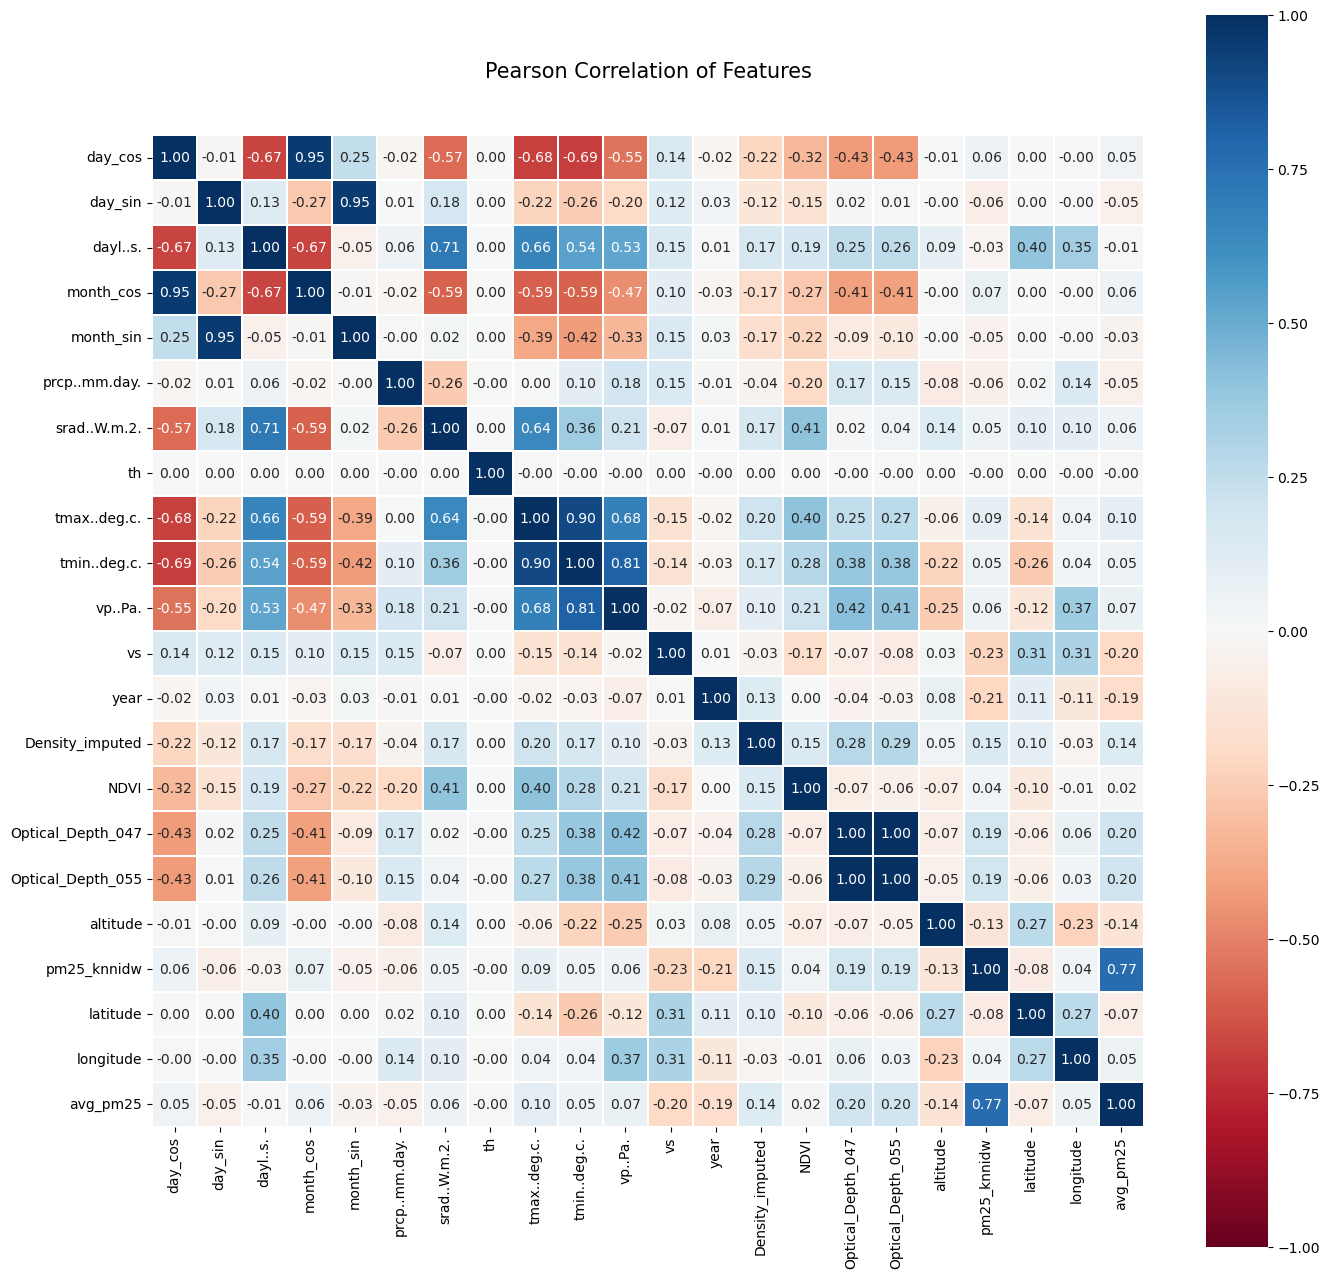

In [7]:
#Mapping commands
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(old_df.corr(),
            linewidths=0.1,vmax=1.0, vmin=-1.0,
            square=True, cmap=colormap, 
            linecolor='white', annot=True, fmt=".2f")
plt.show()

# New DF

In [8]:
X_path = sorted(glob.glob("../data/input_TS_merge/TS_X.npy"))
y_path = sorted(glob.glob("../data/input_TS_merge/TS_y.npy"))

print(f"Num. of Days of Training Set: {len(X_path)}")

X = np.concatenate([np.load(daily_X_path) for daily_X_path in X_path])
y = np.concatenate([np.load(daily_y_path) for daily_y_path in y_path])

mask = list(range(0, 23))
mask.remove(15)
mask.remove(16)
X = X[:, :, mask]

new_var = ['aod_047', 'aod_055','day_cos','day_sin','daymet_dayl','daymet_lat',
           'daymet_lon','daymet_prcp','daymet_srad','daymet_tmax','daymet_tmin',
           'daymet_vp','dem','gridmet_th','gridmet_vs','knnidw_pm25_val','month_cos',
           'month_sin','ndvi','wildfire_smoke','year',
          ]

Num. of Days of Training Set: 1


In [9]:
new_df = np.hstack((X[:,-1,:], y.reshape(-1,1)))
new_df = pd.DataFrame(new_df, columns=new_var+["avg_pm25"])

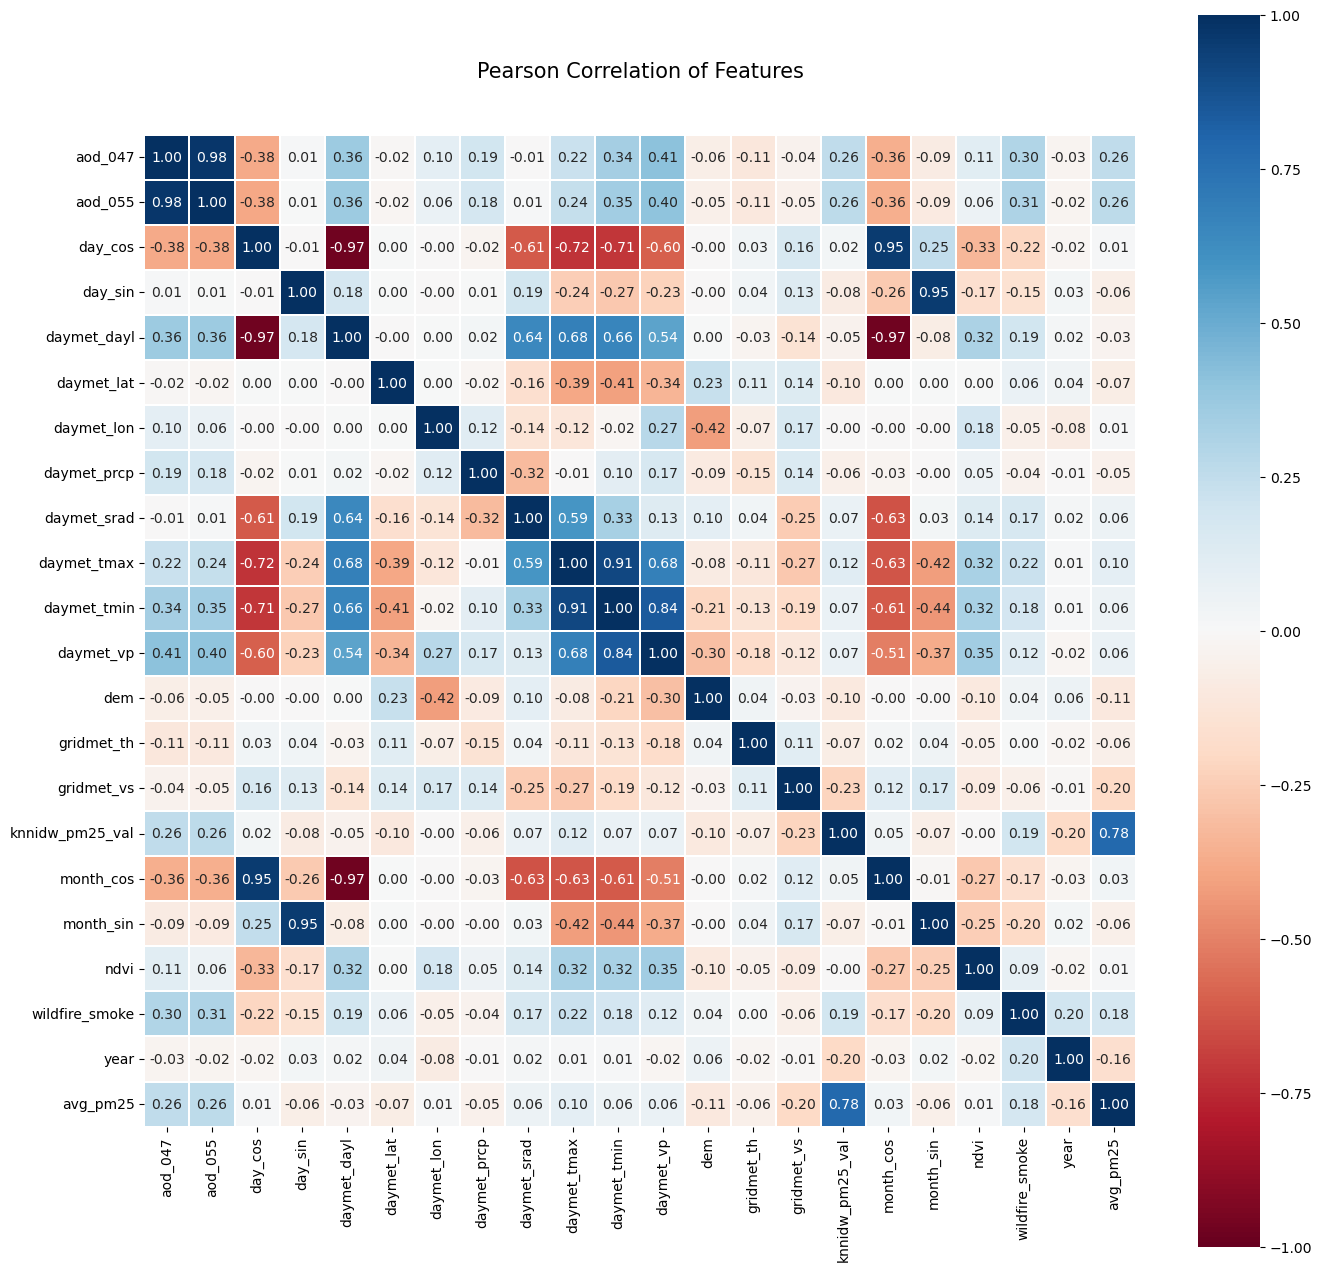

In [10]:
#Mapping commands
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new_df.corr(),
            linewidths=0.1,vmax=1.0, vmin=-1.0,
            square=True, cmap=colormap, 
            linecolor='white', annot=True, fmt=".2f")
plt.show()

# Point2Point Check

In [53]:
old_df.iloc[166]

day_cos                  0.598181
day_sin                  0.801361
dayl..s.             38290.800000
month_cos                0.500000
month_sin                0.866025
prcp..mm.day.            0.000000
srad..W.m.2.           296.110000
th                     140.001892
tmax..deg.c.            10.260000
tmin..deg.c.            -1.010000
vp..Pa.                355.400000
vs                       3.074592
year                  2007.000000
Density_imputed          0.000000
NDVI                     0.040993
Optical_Depth_047      132.599767
Optical_Depth_055       98.537761
altitude               749.000000
pm25_knnidw              9.785666
latitude                43.745610
longitude             -101.941218
avg_pm25                 5.000000
Name: 166, dtype: float64

In [60]:
new_df[(new_df['year']==2007) 
       & (new_df['avg_pm25'].between(4.99, 5.01)) 
       & (new_df['day_cos'].between(0.5980, 0.5982))
       & (new_df['daymet_lat'].between(43.5, 43.9))].iloc[0]

aod_047              116.192192
aod_055              115.155945
day_cos                0.598181
day_sin                0.801361
daymet_dayl        38290.800781
daymet_lat            43.578743
daymet_lon          -101.938187
daymet_prcp            0.000000
daymet_srad          296.109985
daymet_tmax           10.260000
daymet_tmin           -1.010000
daymet_vp            355.399994
dem                  879.000000
gridmet_th           140.000000
gridmet_vs             3.100000
knnidw_pm25_val        9.172781
month_cos              0.500000
month_sin              0.866025
ndvi                   0.242678
wildfire_smoke         0.000000
year                2007.000000
avg_pm25               5.000000
Name: 189594, dtype: float64